# Statistics Exercises

<hr style="border:2px solid gray">

1. How likely is it that you roll doubles when rolling two dice?

1. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

1. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

1. Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

1. Compare Heights

    - Men have an average height of 178 cm and standard deviation of 8cm.
    - Women have a mean of 170, sd = 6cm.
    - If a man and woman are chosen at random, P(woman taller than man)?

1. When installing anaconda on a student's computer, there's a 1 in 250 chance
   that the download is corrupted and the installation fails. What are the odds
   that after having 50 students download anaconda, no one has an installation
   issue?  100 students?

    What is the probability that we observe an installation issue within the first
    150 students that download anaconda?

    How likely is it that 450 students all download anaconda without an issue?

1. There's a 70% chance on any given day that there will be at least one food
   truck at Travis Park. However, you haven't seen a food truck there in 3 days.
   How unlikely is this?

    How likely is it that a food truck will show up sometime this week?

1. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

<hr style="border:0.5px solid black">
<hr style="border:0.5px solid black">

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#be able to reproduce our results
np.random.seed(333)

<b>1. How likely is it that you roll doubles when rolling two dice?</b>
- <b>Answer</b>: 16.6%

Our options for rolling doubles are:
- <b>(1,1)</b> - <b>(X,X)</b>- (1,2)- (1,3)- (1,4)- (1,5)- (1,6)
- <b>(2,2)</b> - (2,1)- <b>(X,X)</b>- (2,3)- (2,4)- (2,5)- (2,6) 
- <b>(3,3)</b> - (3,1)- (3,2)- <b>(X,X)</b>- (3,4)- (3,5)- (3,6) 
- <b>(4,4)</b> - (4,1)- (4,2)- (4,3)- <b>(X,X)</b>- (4,5)- (4,6) 
- <b>(5,5)</b> - (5,1)- (5,2)- (5,3)- (5,4)- <b>(X,X)</b>- (5,6) 
- <b>(6,6)</b> - (6,1)- (6,2)- (6,3)- (6,4)- (6,5)- <b>(X,X)</b> 

In [2]:
#answer by hand (six sides to a dice)
6/36

0.16666666666666666

In [3]:
#number of times we're going to roll
n_trials = 10_000 

#number of dice
n_dice = 2

#assign the outcomes
outcome = [1,2,3,4,5,6]

<b>Remember</b>:
    
The correct syntax for this is:
    
```np.random.choice(a, size=None)```

- a = 1-D array-like or int
- size = number of trials & number of items


In [4]:
#assign variable using numpy
rolls = np.random.choice(outcome, size = (n_trials, n_dice))

#call the variable
rolls

array([[5, 5],
       [6, 4],
       [4, 5],
       ...,
       [1, 4],
       [4, 4],
       [1, 4]])

In [5]:
#does roll of 1st dice equal roll of 2nd dice?
rolls[:,0] == rolls[:,1]

array([ True, False, False, ..., False,  True, False])

In [6]:
#give me the average number of times that dice 1 roll equals dice 2 roll
(rolls[:,0] == rolls[:,1]).mean()

0.1659

<hr style="border:0.5px solid grey">

Another way to answer this:

In [7]:
#assign outcomes for first dice
roll1 = np.random.choice(outcome, size = (100000, 1))

#assign outcomes for second dice
roll2 = np.random.choice(outcome, size = (100000, 1))

In [8]:
#does dice1 roll equal dice2 roll
(roll1 == roll2).mean()

0.16537

<hr style="border:1px solid black">

<b> #2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

- <b>Answer</b>: 
    - exactly 3 heads = 22.42%
    - more than 3 heads = 63%

In [9]:
#number of trials
n_trials= 10000

#number of coins
n_coins = 8

#assign heads
heads =1
#assign tails
tails =0

#assign the possible outcomes
outcomes=[heads, tails]

In [10]:
flips= np.random.choice(outcomes, size =(n_trials, n_coins))

flips

array([[1, 0, 0, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 0, 1, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 1]])

In [11]:
#add up how many times we get head '1'
num_heads = flips.sum(axis=1)

#take a look
num_heads

array([3, 6, 5, ..., 3, 4, 4])

In [12]:
#average that we get at least 3 heads 
calculated_prob=(num_heads == 3).mean()

#take a look
calculated_prob

0.2242

<hr style="border:0.5px solid grey">

If we wanted <b>more</b> than 3

In [13]:
calculated_prob=(num_heads > 3).mean()

In [14]:
calculated_prob

0.6343

<hr style="border:1px solid black">

<b> #3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

<b>Answer</b>: 5.68%

<b>Break it down</b>:
- 3 webdev per 1 dS == 1/4 classes is DS == 25% of classes are DS
- 2 billboards
- odds of both having a data science student on it
- 25% chance per billboard * 2 billboards = 1/8

In [15]:
# ANSWER with probability
(1/4) * (1/4)

0.0625

In [16]:
#ANSWER with simulation

#3/4 are WDev classes
p_WDev = 0.75 
#1/4 are DS classes
p_DS = 0.25 

#number of attempts
n_trials = 10_000 
#number of billboards
n_billboards = 2 

In [17]:
#np.random.random does not require outcomes
boards = np.random.random((n_trials, n_billboards))
boards

array([[0.97003048, 0.36319237],
       [0.9685952 , 0.80109649],
       [0.14707623, 0.83083886],
       ...,
       [0.6387485 , 0.78625448],
       [0.22474727, 0.6820847 ],
       [0.23090251, 0.18509385]])

In [18]:
#chances of DS on billboard = random being less than 0.25
DS_billboard = boards < p_DS 
DS_billboard

array([[False, False],
       [False, False],
       [ True, False],
       ...,
       [False, False],
       [ True, False],
       [ True,  True]])

In [19]:
#this gives the average of how many times DS student being on billboard is equal to 2
(DS_billboard.sum(axis=1)==2).mean() 

0.0568

Another way to answer this:

In [20]:
#using random.choice instead
DS = 1/4
WD = 3/4
outcomes = [DS, WD]

In [21]:
billboard2 = np.random.choice(outcomes, size = (n_trials, n_billboards), p = [1/4, 3/4])

#turn it into a dataframe
billboard2 = pd.DataFrame(billboard2)
billboard2.head()

,0,1
0,0.75,0.25
1,0.75,0.75
2,0.75,0.25
3,0.75,0.75
4,0.75,0.25


In [22]:
billboard2["number_of_data_science"] = (billboard2 == 0.25).sum(axis=1)
(billboard2.number_of_data_science == 2).mean()

0.0639

<hr style="border:1px solid black">

<b> #4. Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

<b>Answer</b>: 72.4%

<b>Break it down</b>:
    
- 1.5-4.5 puchases a day (average 3)
- 17 packages every monday
- probability to buy one on Friday
- <u>Mon</u>: 17 - (1.5-4.5) = 15.5-12.5 =day 1 prob = 100%
- <u>Tues</u>: 15-12.5 - (1.5-4.5)= 13.5-8 = day 2 prob 100% 
- <u>Wed</u>: 13.5-8 - (1.5-4.5)= 12-3.5 = day 3 prob 100%
- <u>Thurs</u>: 12-3.5 - (1.5-4.5)= 10.5-(-1) = day 4, could have 10.5 or -1 left / 50% chance
- <u>Friday</u>: 10.5 -(-1) - (1.5-4.5) = 9-(-5.5)= day 4, could have 9 or -5.5/ 50% chance

In [23]:
#average number of poptarts daily
pop_avg = 3

#give or take (std)
pop_std = 1.5

#how many schools days
n_days= 5

#how many events
n_trials = 1_000_000

In [24]:
simulated_consumed_poptarts= np.random.normal(pop_avg, pop_std,(n_trials, n_days))
simulated_consumed_poptarts

array([[6.60817428, 0.74996385, 3.18005397, 1.28679525, 3.19141272],
       [1.70504093, 3.53701166, 4.51506533, 5.00928193, 5.80705042],
       [1.12479726, 2.77803892, 2.6516598 , 4.23173484, 3.40220035],
       ...,
       [2.83859598, 2.92372201, 5.16776322, 1.7207749 , 1.27378768],
       [1.81210175, 3.76201278, 4.02602468, 2.65864037, 5.55555663],
       [1.49870835, 4.13031604, 4.79086371, 2.1744058 , 2.88843077]])

In [25]:
calculated_prob = (simulated_consumed_poptarts.sum(axis=1) <16).mean()
calculated_prob

0.617346

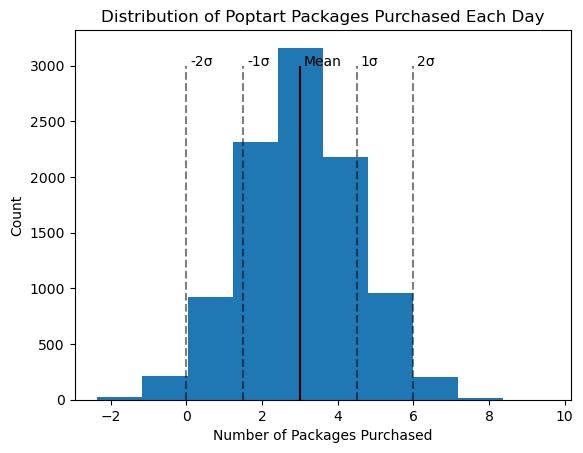

In [26]:
#let's visualize this distribution
plt.hist(np.random.normal(3, 1.5, size = (10000)))
plt.title('Distribution of Poptart Packages Purchased Each Day')
plt.vlines(3, 0, 3000, color='black')
plt.text(3.1, 3000, 'Mean')
plt.vlines(4.5, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(4.6, 3000, '1σ')
plt.vlines(6.0, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(6.1, 3000, '2σ')
plt.vlines(1.5, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(1.6, 3000, '-1σ')
plt.vlines(0, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(0.1, 3000, '-2σ')
plt.ylabel('Count')
plt.xlabel('Number of Packages Purchased')
plt.show()

<hr style="border:0.5px solid grey">

Another way to answer this:

In [27]:
#number of poptarts
n_packages = 17 

#number of days (M-F days of class)
n_days = 5 

#number of attempts
n_trials = 10_000 

In [28]:
#this is acknowledging that 3 is the average but the range is +-1.5
packages = np.round(np.random.normal(3,1.5, (n_trials, n_days)))
packages

array([[ 5.,  5.,  2.,  4.,  2.],
       [ 2.,  2.,  3.,  2.,  1.],
       [ 0.,  2.,  4.,  5.,  6.],
       ...,
       [ 2.,  1.,  6., -0.,  2.],
       [ 3.,  2.,  3.,  2.,  4.],
       [ 2.,  2.,  3.,  1.,  4.]])

In [29]:
package_purchased = np.where(packages < 0,0,packages)
package_purchased

array([[ 5.,  5.,  2.,  4.,  2.],
       [ 2.,  2.,  3.,  2.,  1.],
       [ 0.,  2.,  4.,  5.,  6.],
       ...,
       [ 2.,  1.,  6., -0.,  2.],
       [ 3.,  2.,  3.,  2.,  4.],
       [ 2.,  2.,  3.,  1.,  4.]])

In [30]:
all_packages = package_purchased.sum(axis=1)
all_packages

array([18., 10., 17., ..., 11., 14., 12.])

In [31]:
package_left_friday = all_packages < 17
package_left_friday

array([False,  True, False, ...,  True,  True,  True])

In [32]:
prob_left_friday = package_left_friday.mean()
prob_left_friday

0.6653

<hr style="border:1px solid black">

<b>#5. Compare Heights</b>
- Men have an average height of 178 cm and standard deviation of 8cm.
- Women have a mean of 170, sd = 6cm.
- If a man and woman are chosen at random, P(woman taller than man)?

<b>Answer</b>: 21.09%

<b>Break it down</b>:
- men = 178cm/sd:8cm
- women = 170cm/sd: 6cm

In [33]:
#determine average mens height
men_avg= 178
#determine mens height std
men_std=8

#determine average womens height
women_avg=170
#determine womens height std
women_std=6

#number of trials
n_trials = 1_000_000

In [34]:
#simulation for 1M men
s_men = np.random.normal(men_avg, men_std, n_trials)

In [35]:
#simulation for 1M women
s_women = np.random.normal(women_avg, women_std, n_trials)

In [36]:
#probability that women are taller then men -on average
calculated_prob = (s_women > s_men).mean()

#take a look
calculated_prob

0.210868

<hr style="border:0.5px solid grey">

Another way to answer this:

In [37]:
#height = random(height given, std, number of attempts)
M_height = np.random.normal(178,8,10000)
W_height = np.random.normal(170,6,10000)

In [38]:
#turn height simulations into a dataframe
heights = pd.DataFrame({'Men': M_height, 'Women': W_height})

#take a look
heights.head()

,Men,Women
0,187.628866,176.313505
1,171.071523,167.206310
2,179.971505,160.570195
3,185.780155,173.528840
4,161.722842,166.289543


In [39]:
#male height - female height
difference = heights['Women'] - heights ['Men'] 

#take a look
difference

0      -11.315361
1       -3.865213
2      -19.401310
3      -12.251316
4        4.566701
          ...    
9995     8.740219
9996    -8.019797
9997   -12.642776
9998   -19.470720
9999    -6.935910
Length: 10000, dtype: float64

In [40]:
#if women are taller the difference is greater than 0
women_taller = difference >0 

#take a look- True meaning women is taller
women_taller

0       False
1       False
2       False
3       False
4        True
        ...  
9995     True
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [41]:
#gives the rate of women being taller
rate_women_taller = women_taller.mean() 

#answer
rate_women_taller

0.2081

<hr style="border:1px solid black">

<b> #6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. 
- What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?
- What is the probability that we observe an installation issue within the first 150 students that download anaconda?
- How likely is it that 450 students all download anaconda without an issue?

<b>Break it down</b>:
- prob_fail = 1/250
- 50 students == 0 fails
- 100 students == 0 fails
- 150 students >= 1 fail
- 450 students == 0 fails

<b>50 installs

<b>Answer</b>: 81.87%

In [42]:
#number of simulations
n_sims= 1_000_000

#number of installations
n_installs= 50

#outcomes
conda_fails= 1
success = 0
outcomes= [conda_fails, success]

#probability
prob_fail= 1/250

In [43]:
#simulate for 50 installations 
installs = np.random.choice(outcomes, size = (n_sims, n_installs), p = [249/250, 1/250])
installs

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [44]:
((installs < prob_fail).sum(axis=1)== 0).mean()

0.818724

<b>100 installs

<b>Answer</b>: 66.92%

In [45]:
#number of simulations
n_trials= 1_000_000

#number of installations
n_installs= 100

#possible outcomes
conda_fails= 1
success = 0

#probability
prob_fail= 1/250

In [46]:
installs_100 = np.random.choice(outcomes, size = (n_sims, n_installs), p = [249/250, 1/250])
((installs_100 < prob_fail).sum(axis=1)== 0).mean()

0.669211

<b>Another way to accomplish this</b>

In [47]:
installs = np.random.random((n_trials,n_installs))
installs

array([[0.77711666, 0.90207196, 0.74571202, ..., 0.74609498, 0.40039421,
        0.39141898],
       [0.52246929, 0.74703353, 0.74656873, ..., 0.05513215, 0.73765863,
        0.11009018],
       [0.96676741, 0.2201189 , 0.08134508, ..., 0.01836746, 0.67849788,
        0.65651935],
       ...,
       [0.92799322, 0.35757065, 0.06214544, ..., 0.25472237, 0.52511225,
        0.30596644],
       [0.3889177 , 0.76906259, 0.49403499, ..., 0.75360897, 0.77324306,
        0.11078469],
       [0.37592768, 0.72545266, 0.94456819, ..., 0.60725083, 0.85905367,
        0.03546811]])

In [48]:
installs < prob_fail

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [49]:
((installs < prob_fail).sum(axis=1)== 0).mean()

0.669292

<b>150 installs at least 1 fail

<b>Answer</b>: 45.20%

In [50]:
n_trials= 1_000_000
outcomes = ['S', 'F']
n_students = 150

In [51]:
downloads = np.random.choice(outcomes, size=(n_trials, n_students), 
                p = [249/250, 1/250])

In [52]:
((downloads == 'S').sum(axis=1) < n_students).mean()

0.452054

<b>450 installs

<b>Answer</b>: 16.48%

In [53]:
#number of simulations
n_simulations= 1_000_000
outcomes = ['S', 'F']
n_students = 450

In [54]:
downloads = np.random.choice(outcomes, size=(n_simulations, n_students), 
                p = [249/250, 1/250])


In [55]:
((downloads == 'S').sum(axis=1) == n_students).mean()

0.164751

<hr style="border:1px solid black">

<b> #7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?</b>

<b>Answer</b>: 2.73%

In [61]:
n_trials= 1_000_000
n_trucks= 3
food_truck=1
no_truck=0

truck_prob = 0.7

In [62]:
data= np.random.random((n_trials,n_trucks))

In [63]:
((data < truck_prob).sum(axis=1)==0).mean()

0.027302

<b>On last 2 days of week:

<b>Answer</b>: 90.99%

In [65]:
n_trials= 1_000_000
#2 days left in week
n_days= 2 
food_truck=1
no_truck=0
truck_prob = 0.7

In [66]:
lunch_days = np.random.random((n_trials,n_days))

In [67]:
calculated_prob= ((lunch_days < truck_prob).sum(axis=1) >0).mean()
calculated_prob

0.909926

<hr style="border:1px solid black">

<b> #8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?</b>

<b>Break it down</b>:
- 365 days in a year
- 23 people in class
- prob of same birthday

<b>23 students in the class

<b>Answer</b>: 50.59%

In [68]:
#number of days in a year
outcomes = range(0, 365) 

#number of students
n_trials= 23 
n_simulated= 1_000_000 

Anytime there is less than 23 unique numbers, we know that there must be a shared birthday

In [69]:
bd = np.random.choice(outcomes, size=(n_simulated, n_trials))
bd

array([[ 92,  19,  79, ..., 135, 119, 292],
       [348, 189,   4, ..., 178, 157, 206],
       [ 69, 191, 129, ..., 142, 304, 118],
       ...,
       [144, 280, 335, ..., 320, 221, 139],
       [332, 251, 151, ...,  99,  22,  83],
       [ 11, 135,  52, ...,   5,  51, 303]])

In [70]:
pd.DataFrame(bd).nunique(axis = 1)

0         22
1         22
2         22
3         23
4         22
          ..
999995    21
999996    23
999997    22
999998    22
999999    23
Length: 1000000, dtype: int64

In [71]:
#percentage of room with a shared birthday
(pd.DataFrame(bd).nunique(axis = 1) < 23).mean()

0.507979

<b>20 students per class

<b>Answer</b>: 41.06%

In [72]:
n_simulations = 100_000
n_people = 20

#number of days in a year
outcomes = range(0, 365) 

In [73]:
# Produce some random birthdays
birthdays = np.random.choice(outcomes, size=(n_simulations, n_people))
birthdays

array([[353, 251, 231, ..., 229,  17, 226],
       [158, 274, 292, ..., 104,  59, 113],
       [207, 237,  13, ..., 307,  16,  80],
       ...,
       [315, 314, 169, ..., 150, 232, 359],
       [ 65, 333, 189, ...,  42, 156, 235],
       [331, 158,  27, ..., 218, 159, 319]])

In [74]:
#create the dataframe of birthdays
df = pd.DataFrame(birthdays)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,353,251,231,194,24,320,36,319,299,111,66,153,148,228,3,268,212,229,17,226
1,158,274,292,333,121,271,330,239,156,101,221,161,255,185,316,319,71,104,59,113
2,207,237,13,91,328,191,89,265,161,213,26,334,38,89,295,30,251,307,16,80
3,96,242,47,34,111,139,147,307,176,81,338,347,191,273,117,22,277,52,191,183
4,155,15,240,97,199,218,233,290,278,72,279,123,125,277,252,143,177,242,34,314


In [75]:
#create columns of unique values
df["n_unique"] = df.nunique(axis=1)
#take a look
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,n_unique
0,353,251,231,194,24,320,36,319,299,111,...,153,148,228,3,268,212,229,17,226,20
1,158,274,292,333,121,271,330,239,156,101,...,161,255,185,316,319,71,104,59,113,20
2,207,237,13,91,328,191,89,265,161,213,...,334,38,89,295,30,251,307,16,80,19
3,96,242,47,34,111,139,147,307,176,81,...,347,191,273,117,22,277,52,191,183,19
4,155,15,240,97,199,218,233,290,278,72,...,123,125,277,252,143,177,242,34,314,20


In [76]:
#average of where column of unique values is NOT equal to number of students
(df.n_unique != n_people).mean()

0.41314

<b>40 students per class

<b>Answer</b>: 89.28%

In [77]:
n_simulations = 100_000
n_people = 40

#number of days in a year
outcomes = range(0, 365) 

In [78]:
#produce some random birthdays
birthdays = np.random.choice(outcomes, size=(n_simulations, n_people))
birthdays

array([[  8,  60,  65, ..., 143,  59, 248],
       [280, 265, 300, ..., 232, 276, 136],
       [144, 233, 224, ..., 245,  41,  68],
       ...,
       [208, 362, 141, ...,  60,  47,   9],
       [ 48,  32, 307, ..., 357, 147,  16],
       [  8, 272, 289, ...,  47, 297, 358]])

In [79]:
#create the dataframe of birthdays
df = pd.DataFrame(birthdays)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,8,60,65,172,341,282,250,220,83,122,...,330,9,316,95,185,113,279,143,59,248
1,280,265,300,134,36,181,114,247,200,251,...,304,146,264,88,2,322,176,232,276,136
2,144,233,224,305,165,0,151,306,106,212,...,99,315,351,164,251,315,142,245,41,68
3,62,90,181,86,315,242,224,245,22,117,...,76,64,256,225,116,191,204,135,340,169
4,68,295,160,28,243,50,358,227,192,320,...,317,334,16,89,362,72,329,289,26,323


In [80]:
#create columns
df["n_unique"] = df.nunique(axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,n_unique
0,8,60,65,172,341,282,250,220,83,122,...,9,316,95,185,113,279,143,59,248,36
1,280,265,300,134,36,181,114,247,200,251,...,146,264,88,2,322,176,232,276,136,39
2,144,233,224,305,165,0,151,306,106,212,...,315,351,164,251,315,142,245,41,68,37
3,62,90,181,86,315,242,224,245,22,117,...,64,256,225,116,191,204,135,340,169,40
4,68,295,160,28,243,50,358,227,192,320,...,334,16,89,362,72,329,289,26,323,39


In [81]:
#average of where column of unique values is NOT equal to number of students
(df.n_unique != n_people).mean()

0.89141